# **8. 신경망 딥러닝의 응용**

이제 실질적인 문제를 통해 필기체 숫자(MNIST) 데이터 셋에 대해 피드 포워드 네트워크를 인식시켜 봅시다.

# **8.1 MNIST 데이터베이스**

필기체 데이터셋은 MNIST라는 데이터 베이스를 쓸 것이며, keras를 이용하면 더 쉽게 쓸 수 있다. (물론, pytorch도 제공한다)


In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


60000개 씩의 훈련용 데이터가 저장되고 10000개의 테스트용 데이터가 저장된다. 총 10개의 category를 가지며, i번째 이미지는 x_train[i, :, :] 로 꺼낼 수 있다.

입력 : 60000 * 28 * 28 각 요소는 0~255 사이의 값  
i 번째 이미지 : x_train[i, :, :]  


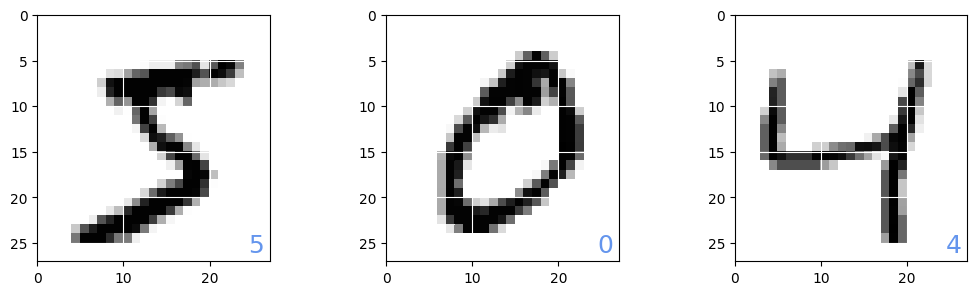

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize = (12, 3.2))
plt.subplots_adjust(wspace = 0.5) #서브 플롯들 사이의 간격
plt.gray() #회색조 컬러맵

for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, : :]
    plt.pcolor(255 - img) #이미지의 각 pixel 값을 255에서 빼기
    plt.text(24.5, 26, "%d" % y_train[id], color = 'cornflowerblue', fontsize = 18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color = 'white')
plt.show()

# **8.2 2층 피드 포워드 네트워크 모델**

7장에서 다룬 같은 2층 피드 포워드 네트워크 모델을 통해 필기체 숫자의 클래스 분류 문제를 해결해보자.

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical #np_utils 삭제되었음.

# 데이터 전처리
x_train = x_train.reshape(60000, 784) # (A) 60000 X 784 로 변환
x_train = x_train.astype('float32') # (B) int -> float
x_train = x_train / 255 # (C) 0~1 사이의 값으로 변환

num_classes = 10
y_train = to_categorical(y_train, num_classes) # (D) one hot encoding

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes)



입력 : 28 x 28의 이미지 데이터 784 길이의 벡터로 입력  
전체 학습과정은 아래 그림과 같다.

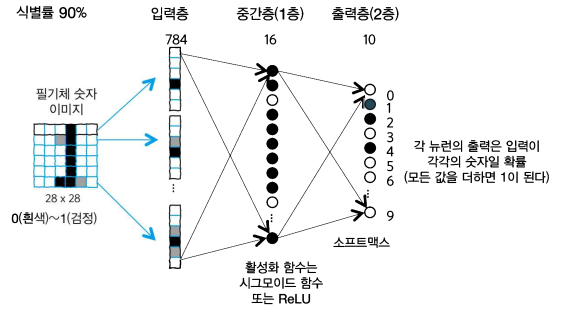

출력층 활성화 함수 : softmax(확률값으로 나타내기 위해서)  
중간층 : 16개  
중간층 활성화 함수 : 시그모이드 함수

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential() # (A) model을 Sequential 로 정의 순차적인 층을 쌓아올리는 방식
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B) 784 차원 입력을 갖는 16개의 중간층
model.add(Dense(10, activation='softmax')) # (C) 10갸의 출력층
#Dense 는 fully connected layer를 의미
model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy']) # (D)

In [ ]:
import time


startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test)) # (A) verbose = 1로 인해 매 시기의 학습 평가치가 표시
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 12ms/step - loss: 1.9543 - accuracy: 0.5034 - val_loss: 1.6532 - val_accuracy: 0.6612
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 1.4871 - accuracy: 0.7193 - val_loss: 1.3212 - val_accuracy: 0.7626
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 1.2155 - accuracy: 0.7793 - val_loss: 1.0971 - val_accuracy: 0.8067
Epoch 4/10
60/60 [==============================] - 0s 8ms/step - loss: 1.0232 - accuracy: 0.8123 - val_loss: 0.9339 - val_accuracy: 0.8312
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.8810 - accuracy: 0.8353 - val_loss: 0.8111 - val_accuracy: 0.8481
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.7731 - accuracy: 0.8511 - val_loss: 0.7180 - val_accuracy: 0.8623
Epoch 7/10
60/60 [==============================] - 0s 8ms/step - loss: 0.6904 - accuracy: 0.8628 - val_loss: 0.6467 - val_accuracy: 0.8725
Epoch 8/10
60/60 [=

batch_size는 한 번 학습에 사용할 데이터셋의 크기를 말한다. 위의 코드는 batch size를 주었기 때문에 stocastic GD 를 하는 것과 같다.

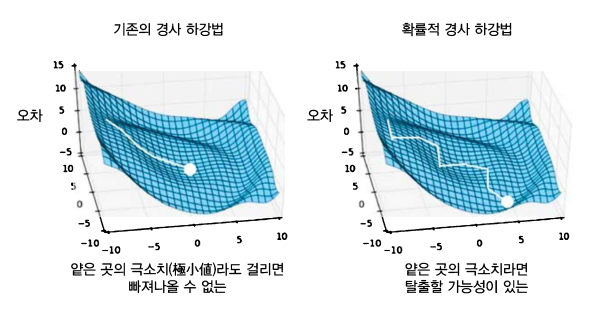

책에서 위의 그림과 같이 설명했지만, 확률적 경사하강법이라고 해서 극소치에서 나갈 수 있다는 것은 아니고, 그럴 가능성이 생길 수는 있다는 의미. 이를 해결하기위해서는 v의 개념을 도입한 nav 등의 적용이 필요하다는 것을 이해.

epoch 마다 배치 사이즈 만큼만 학습을 수행하는 것이 아닌, 배치 크기 만큼의 데이터로 나눠 전체 데이터에 대한 학습을 하는 것.

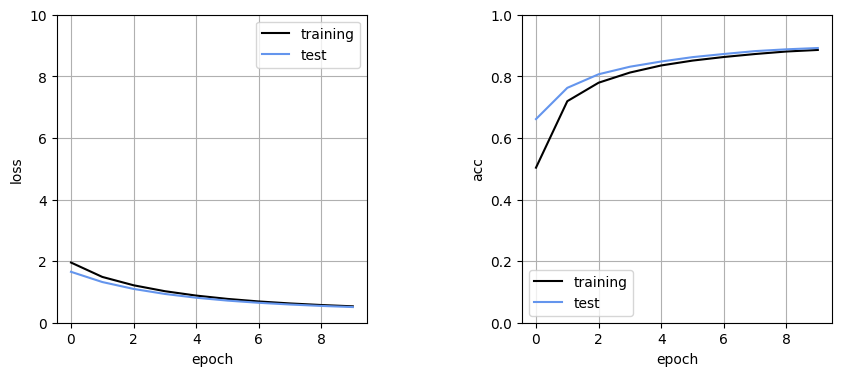

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

90퍼 정도의 정확도를 보이는 것 같은데, 이를 확인하기 위해 실제 뽑아서 봐보자.

313/313 [==============================] - 2s 5ms/step


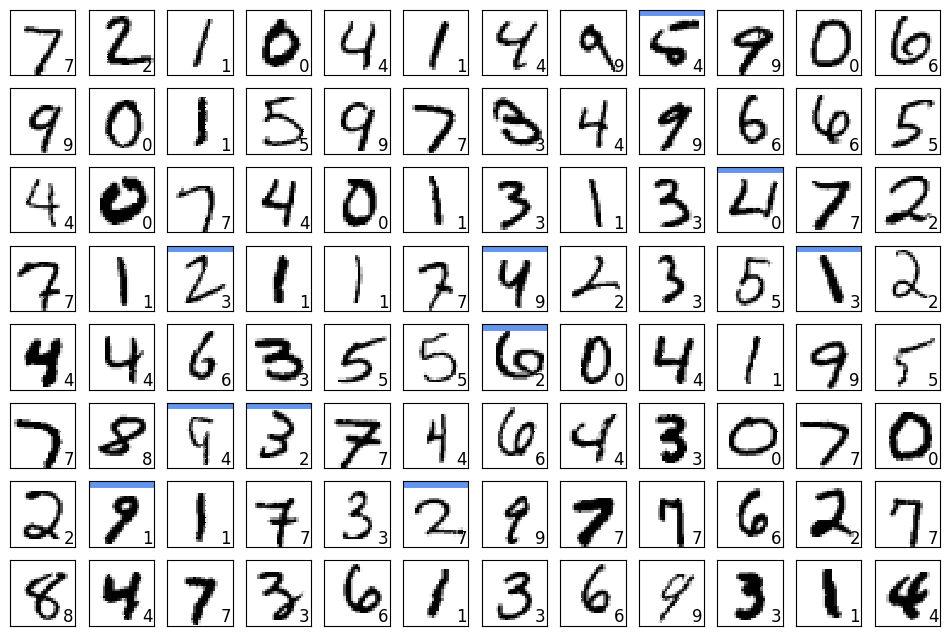

In [ ]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()

# **8.3 ReLU 활성화 함수**

ReLU 라는 새로운 활성화 함수에 대해 알아보자. 아래 그림은 ReLU 와 sigmoid 의 차이를 나타낸 결과다

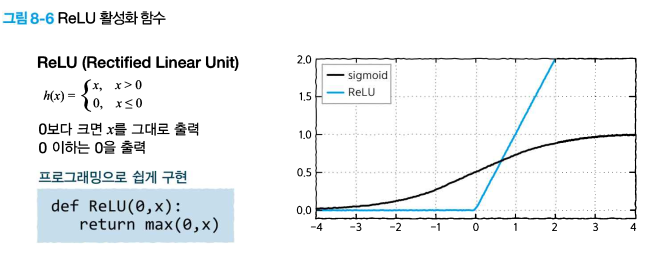

시그모이드의 아쉬운 점은 입력 x가 아무리 커져도 1을 넘길 수 없고, 입력의 변화에 대한 정도를 표현하는데, 어려움이 있을 수 밖에 없다. 그 결과 오차 함수의 가중치 매개 변수에 대한 편미분이 0에 가까운 값이 되어, 경사 하강법의 학습이 느려질 수 있다는 것이지만, ReLU를 보면 변화를 비교적 잘 나타낼 수 있다는 것. 또, max(0, x) 라는 식으로 나타낼 수 있기 때문에, 계산이 빠르다는 것.
즉 장점을 정리하면,  
1. 경사하강법을 더 잘 나타낼 수 있다. 변화의 폭이 시그모이드에 비해 넓기 때문에  
2. max(0, x) 라는 등의  식으로 나타낼 수 있기 때문에, 계산이 간편하다.

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A) activation func 를 relu로 변경
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 1.4735 - accuracy: 0.5720 - val_loss: 0.7837 - val_accuracy: 0.8347
Epoch 2/10
60/60 [==============================] - 0s 8ms/step - loss: 0.5962 - accuracy: 0.8593 - val_loss: 0.4587 - val_accuracy: 0.8858
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 0.4245 - accuracy: 0.8892 - val_loss: 0.3718 - val_accuracy: 0.9028
Epoch 4/10
60/60 [==============================] - 1s 9ms/step - loss: 0.3621 - accuracy: 0.9026 - val_loss: 0.3307 - val_accuracy: 0.9102
Epoch 5/10
60/60 [==============================] - 1s 13ms/step - loss: 0.3278 - accuracy: 0.9105 - val_loss: 0.3093 - val_accuracy: 0.9147
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3060 - accuracy: 0.9165 - val_loss: 0.2903 - val_accuracy: 0.9200
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.2903 - accuracy: 0.9198 - val_loss: 0.2799 - val_accuracy: 0.9222
Epoch 8/10
60/60

시그모이드의 결과보다 학습결과가 상승한 것을 볼 수 있다. 물론 결과가 임의의 seed에 따라 달라질 것. 즉 데이터에 대해 달라질 것이기 때문에, 반드시 이런 결과로 귀결된다고 할 수는 없겠지만, 책의 필자가 수행한 결과 비교적 더 좋은 서응을 보인다고 한다.

313/313 [==============================] - 1s 2ms/step


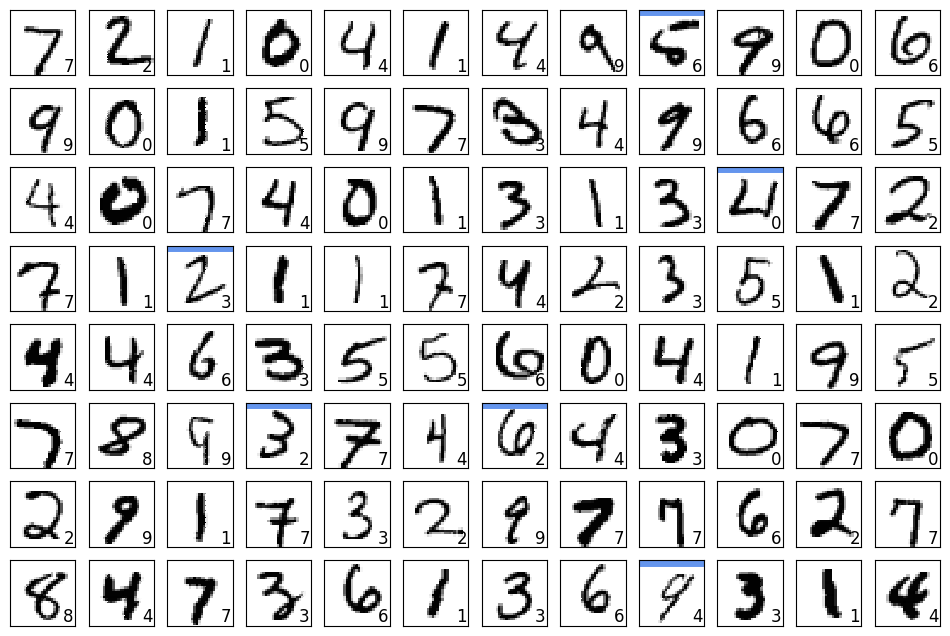

In [ ]:
show_prediction()
plt.show()

이제 궁금한 것은 우리가 학습을 통해 획득한 각 가중치들은 어떤 식으로 나타낼 수 있을까? 라는 것이고, 그 결과를 위한 코드는 아래와 같다.

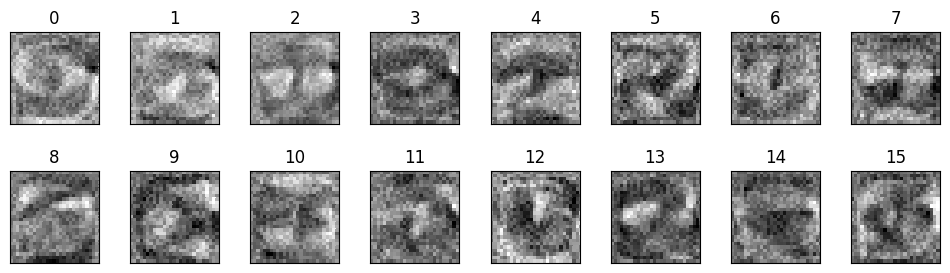

In [ ]:
#1층에 대한 시각화

w = model.layers[0].get_weights()[0] #네트워크 모델의 중간층 가중치 매개변수를 얻기
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

검은 부분은 양의 값 흰색 부분은 음의 값을 나타낸다. 즉 검은 부분에 픽셀이 있으면, 그 값은 활성화 되고, 흰색이 있다면 그 값은 비활성화 되는 것.

27x27 의 입력으로부터 중간층의 16개의 뉴런에 대한 가중치를 그리고 있는데, 앞서 이야기한 것 처럼 해석할 수 있다. 3번을 보면 뭔가 8 같은 형태를 볼 수 있는데, 얘가 8의 이미지에 대한 활동이 증가하는 형태라고도 볼 수 있겠다. 다른 뉴런들도 비슷하게 특정 숫자를 나타내는 방식으로 학습된 것 처럼 보인다.

여기서 성능을 더 높이고 싶다. 라고 하면 어떤 방법이 있을까?  

중간층 뉴런을 늘리는 방법

사실 이 모델에서 보면 알겠지만, 우리는 전혀 차원의 대한 정보를 사용하고 있지 않다는 것인데, 화소의 정렬 순서는 네트워크의 성능과 전혀 상관없다. 전체 데이터셋에서 이미지 위치 (1, 1) 의 픽셀 값을 (3,5) 로 변경한다고 해도, 전혀 문제가 없을 것이다. 즉 픽셀의 순서는 성능과는 전혀 관련이 없다.

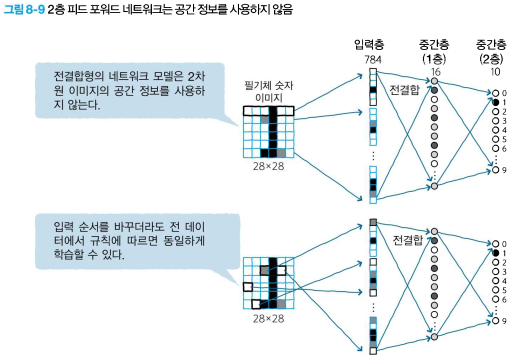

그 이유는 네트워크의 구조가 전결합형이며, 특정 입력이 더 중요하다거나 이런 관계가 아닌, 전부 대등한 관계이기 때문이다. 이웃에 있는 입력 성분도, 멀리 떨어진 입력 성분도 수식상 동일한 관계인 것이고, 무언가에 특히 더 많은 가중치를 준다거나 할 이유가 없다는 것입니다.그래서 공간 정보를 사용하고 있지 않다는 것이다.

# **8.4 공간 필터**

공간 정보는 직선, 곡선, 원형, 사각형 같은 모양을 나타내는 정보를 말한다. 이러한 형태를 추출하는 방법으로 공간 필터 라는 이미지 처리 방법이 있다.

필터는 2차원 행렬로 표현되며, 2차원 행렬의 하나로 세로 엣지를 강조하는 3x3 필터의 예시를 아래 그림에 나타냈다. 이미지의 일부분과 필터 요소를 곱한 합을, 이미지를  슬라이드 시키면서 이미지의 전 영역에서 구하는 이러한 계산을 합성곱 연산이라고 한다.

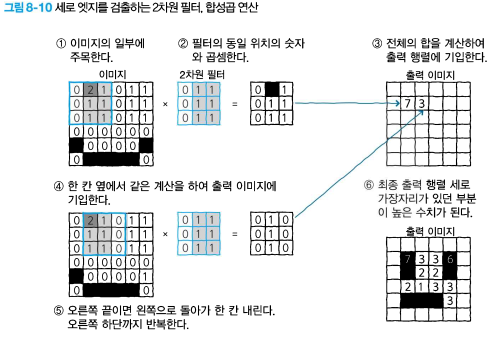

원본 이미지의 위치 (i, j) 픽셀 값을 x(i, j) 3x3 필터를 h(i, j) 라고 할 때, 합성곱연산을 통해 얻어지는 값 g는 아래와 같은 식으로 나타낼 수 있다.

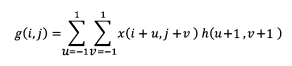

필터의 크기는 3x3뿐 아니라, 임의로 결정할 수 있지만, 5 x 5, 7 x 7 등 중심을 결정할 수 있는 홀수 너비가 사용하기 쉬울 것이다. 실제 필기체 숫자에 합성곱 연산을 시행해보자. 이미지 데이터를 1차원에서 2차원으로 바꿔야 할 것 이다.

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

가로 및 세로를 강조하는 2개의 필터를 훈련 데이터의 2번째인 '4' 에 적용해보자. 값은 0~1 사이의 float 값으로 하자

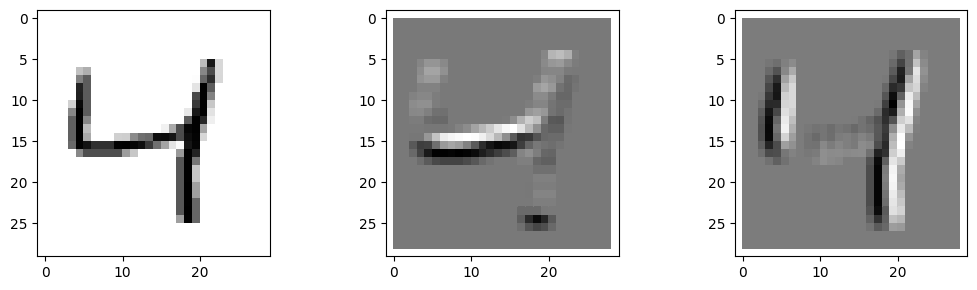

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A) 가로의 특성
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B) 세로의 특성


x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1))


# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

위의 그림 처럼 출력이 나오게 되는데, 보면 2번째는 가로의 특성을 잘 학습한 것을 볼 수 있고, 3번째는 세로의 특성을 학습한 것을 볼 수 있다.

일반적으로 이런 필터를 통해 얻고자 하는 효과는 내가 원하는 요소의 강화인 것이다. 필터의 수치의 변경을 통해 대각선 엣지, 이미지 스무딩, 세부부분의 강조 등 다양한 처리가 가능하다. 공간 구조가 없는 부분은 0으로 변환되고, 필터에 추출 하려는 구조가 존재하면, 0이상의 값으로 변환되어, 0을 감지 레벨의 기준으로 세울 수 있어 편리하다.

문제점 : 필터의 적용시 출력이미지의 크기가 작아지게 된다는 것.  

대응책 : 패딩

패딩은 필터를 적용하기 전에 0등의 고정된 요소로 주위를 부풀려 놓는 기술이다. 아래 그림을 보면 더 이해하기가 쉬울 것이다. 3x3 필터의 적용시 폭 1의 패딩을 하면, 이미지 크기는 변하지 않을 것이고, 5x5의 경우는 폭 2의 패딩을 하면 될것이다. 즉 n x n 의 경우 n/2 의 폭으로 패딩을 하면 된다.

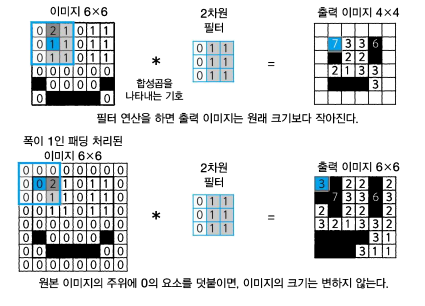

패딩 뿐 아니라, 필터 처리와 관련된 매개 변수가 하나 더 있는데, 이동하는 간격에 대한 stride 라는 것이다.  
stride : 이동하는 간격
스트라이드가 크면 당연히 출력 이미지는 작아지는 효과를 얻게 될 것이다. 패딩과 스트라이드는 값은 라이브러리로 합성곱 네트워크를 사용할 때 인수로 전달하게 된다.

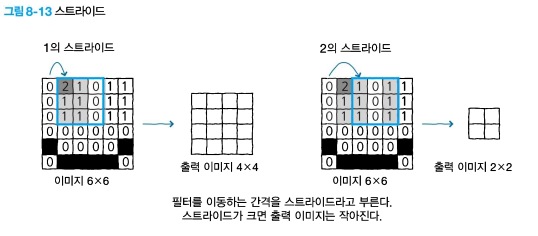

# **8.5 합성곱 신경망**

필터를 사용한 신경망을 합성곱 신경망이라고 한다. 필터에 적용되는 수치에 따라 다양한 이미지 처리가 가능하다.  
CNN : 그 필터 자체를 학습시키는 모델  

앞으로 처리할 CNN은 입력 이미지에 대해 크기 3x3, 패딩 1, 스트라이드 1의 필터를 8장 적용할 것이다.
필터 1장을 거친 출력은 28 x 28 일 것이고 총 8장의 필터를 거치니 28 x 28 x 8 의 3차원 배열이 될 것이다.  
이를 1차원의 길이가 6272인 배열로 전개하고, 전결합으로 10개의 출력층 뉴런에 결합한다.

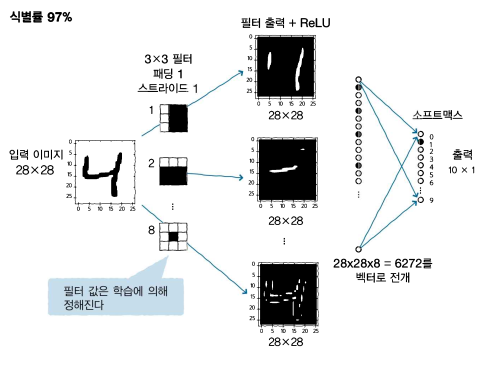

위의 그림이 CNN을 도식화 해놓은 것이라고 할 수 있다.

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

#합성곱층의 출력은 4차원으로 (배치 수, 필터 수, 출력이미지의 세로, 출력이미지의 가로) 로 되어있다.
model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape=(28, 28, 1), activation='relu')) # (A) convolution net 사용 우리는 흑백이미지를 다루기에 28, 28, 1로 bias도 각 변수에 대해 하나씩 적용된다.
model.add(Flatten()) # (B) 합성곱층의 출력을 (배치 수, 필터 수 x 출력 이미지 세로폭 x 출력 이미지 가로 폭) 의 2차원으로 바꿔줘야 한다.
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 11s 170ms/step - loss: 0.7754 - accuracy: 0.8134 - val_loss: 0.3465 - val_accuracy: 0.9023
Epoch 2/20
60/60 [==============================] - 10s 166ms/step - loss: 0.3202 - accuracy: 0.9083 - val_loss: 0.2830 - val_accuracy: 0.9210
Epoch 3/20
60/60 [==============================] - 8s 138ms/step - loss: 0.2758 - accuracy: 0.9219 - val_loss: 0.2512 - val_accuracy: 0.9296
Epoch 4/20
60/60 [==============================] - 10s 162ms/step - loss: 0.2481 - accuracy: 0.9298 - val_loss: 0.2282 - val_accuracy: 0.9346
Epoch 5/20
60/60 [==============================] - 10s 163ms/step - loss: 0.2266 - accuracy: 0.9358 - val_loss: 0.2105 - val_accuracy: 0.9418
Epoch 6/20
60/60 [==============================] - 8s 139ms/step - loss: 0.2073 - accuracy: 0.9413 - val_loss: 0.2005 - val_accuracy: 0.9444
Epoch 7/20
60/60 [==============================] - 10s 163ms/step - loss: 0.1904 - accuracy: 0.9464 - val_loss: 0.1854 - val_accuracy: 0.9507
E

In [ ]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

313/313 [==============================] - 1s 4ms/step


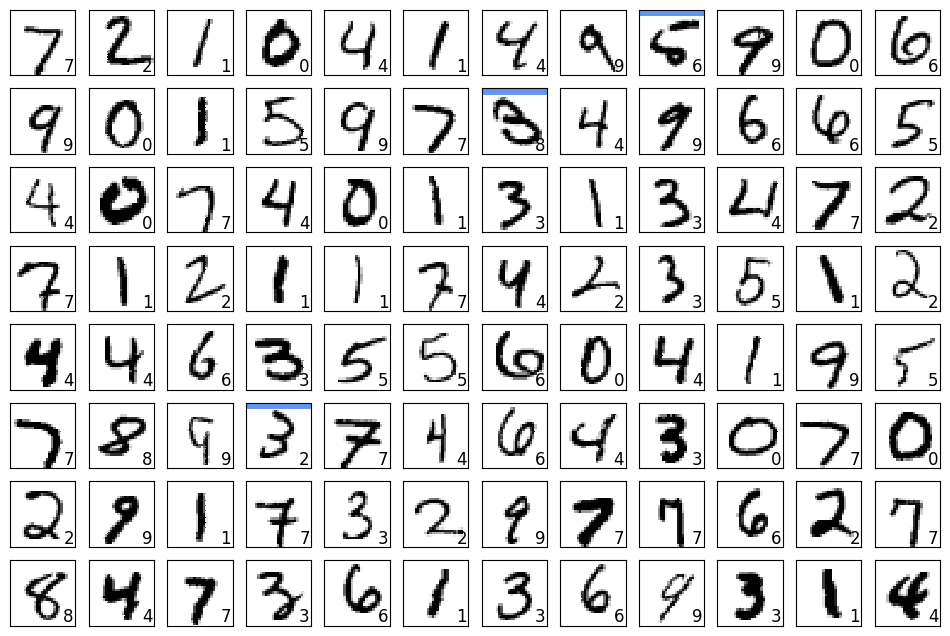

In [ ]:
show_prediction()
plt.show()

아주 학습 효율이 높아진 것을 알 수 있다. 이제 학습에서 획득한 8장의 필터를 살펴보자.

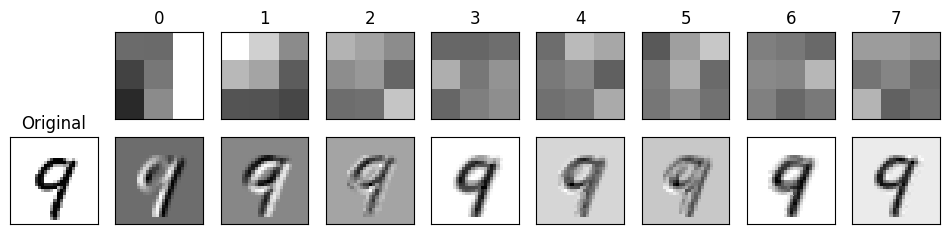

In [ ]:
# 리스트 8-2-(5)
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

각각 학습을 통해 얻은 필터를 볼 수 있고, 각 필터를 적용한 이미지는 아래와 같다.

각 필터의 특징들이 보인다. 전체적으로 모두 강조하는 것, 가로 축만 학습한 등 여러 필터들이 있다. 이런 합성곱 네트워크는 필기체 숫자 뿐 아닌, 문자 인식이나, 화상 인식에서도 힘을 발휘한다.

# **8.6 풀링**

이미지 처리를 하기 위해서 중요한 점은 1픽셀의 변화에도, 컴퓨터는 아예 다른 것으로 받아드린다는 것인데, 이를 해결하기 위해 풀링 처리가 있다. 아래 그림은 2 x 2의 최대 풀링의 예시이며, 입력 이미지 내의 2 x 2 의 작은 영역에 착안해 가장 큰 값을 출력값으로 한다. 작은 공간은 스트라이드 2로 이용해 동일한 처리를 반복하고 있다.

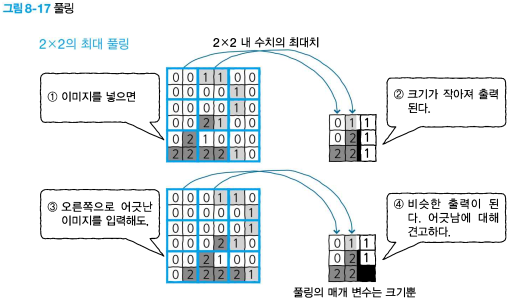

각 영역에 대해 압축한 것으로 볼 수 있으며, 각 풀링의 가장 큰 수를 가져오는 것을 max pooling 이라고 하며, 그 결과로 나온 풀링을 한 값은, 가로 세로의 어긋난 것에 대해 민감하지 않은 것을 알 수있다. 풀링도 결국, 그 크기도 마음대로 정할 수 있으며, 또한, 3x3 에 대해서는 스트라이드 3 4x4 에 대해서는 스트라이드 4 즉 겹치지 않게 하는 경우가 대부분이다.

# **8.7 드롭아웃**

네트워크의 학습을 개선하기 위해 드롭아웃을 제안하는데, 드롭 아웃은 학습 시에 입력층의 유닛과 중간층 뉴런을 확률로 임의로 선택하여, 나머지를 무효화 하는 방법입니다. 즉 이런 방법을 사용하면 무효화된 뉴런은 존재하지 않는 것 처럼 되는 것이며, 미니 배치마다 뉴런을 뽑아 다시 이 절차를 반복한다.

물론 학습 후 예측시에는 모든 뉴런이사용되는데, 이렇게 되면 당연히 출력이 무조건 증가하게 되는데, 그래서 예측 시 드롭아웃을 한 층의 출력 대상의 가중치를 p배로 하여 작게 설정하여 계산을 맞춘다. 드롭아웃은 여러 네트워크를 각각 학습하여 예측 시에 네트워크를 평균화해 합치는 효과가 있다.

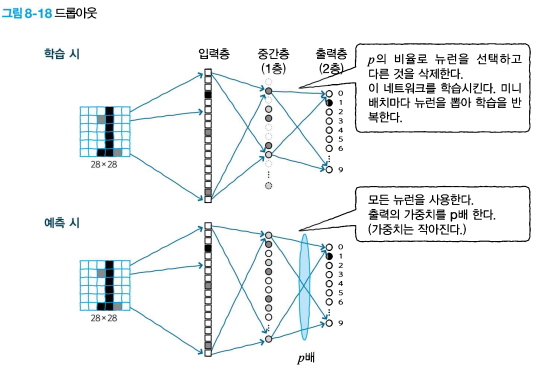

# **8.8 MNIST 인식 네트워크 모델**

합성곱에서 풀링과 드롭아웃을 도입해 계층의 수를 늘리고, 모두를 갖추고 있는 네트워크를 마지막으로 구축해본다.

1층, 2층에서 합송곱층을 연속시킨다.  
1층의 합성곱층은 16장의 필터  
1층의 출력 28 x 28 x 16  
2층의 합성곱층은 32장의 필터(단 3x3x16의 크기를 가지는) 필터를 정의하는 매개 변수는 바이어스를 제외하면 3x3x16x32 가 된다.  


3층 : 2x2 맥스 풀링층으로 가로 세로의 크기는 절반인 14 x 14가 된다.  
4층 : 필터가 64장이고 그렇다면 매개변수는 3x3x16x64 가 된다.
5층 : 맥스 풀링을 위한 7x7로 된다.
6층 : 128개의 전결함
7층 : 출력이 10개인 전결합층

5층, 6층 : dropout

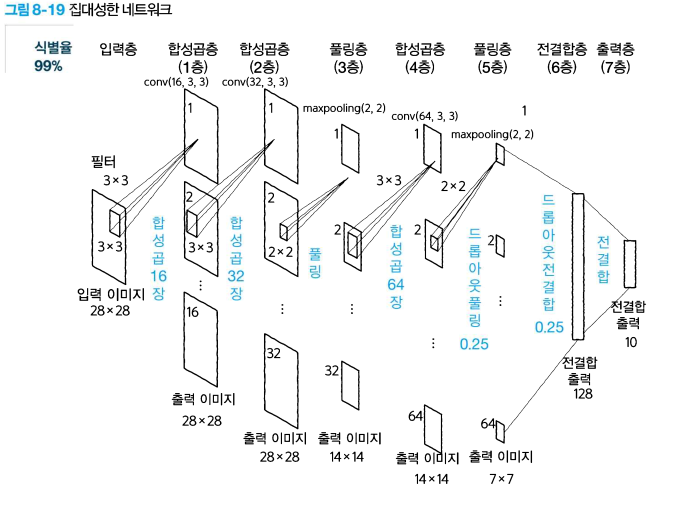

In [ ]:
# 리스트 8-2-(6)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3),
                 input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))


Epoch 1/20
60/60 [==============================] - 75s 1s/step - loss: 0.6915 - accuracy: 0.7865 - val_loss: 0.1249 - val_accuracy: 0.9618
Epoch 2/20
60/60 [==============================] - 70s 1s/step - loss: 0.1351 - accuracy: 0.9592 - val_loss: 0.0642 - val_accuracy: 0.9797
Epoch 3/20
60/60 [==============================] - 77s 1s/step - loss: 0.0891 - accuracy: 0.9725 - val_loss: 0.0452 - val_accuracy: 0.9852
Epoch 4/20
60/60 [==============================] - 71s 1s/step - loss: 0.0691 - accuracy: 0.9790 - val_loss: 0.0348 - val_accuracy: 0.9876
Epoch 5/20
60/60 [==============================] - 87s 1s/step - loss: 0.0582 - accuracy: 0.9814 - val_loss: 0.0304 - val_accuracy: 0.9901
Epoch 6/20
60/60 [==============================] - 70s 1s/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0284 - val_accuracy: 0.9901
Epoch 7/20
60/60 [==============================] - 70s 1s/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 0.0262 - val_accuracy: 0.9914
Epoch 8/20
60/60 [==

313/313 [==============================] - 3s 10ms/step


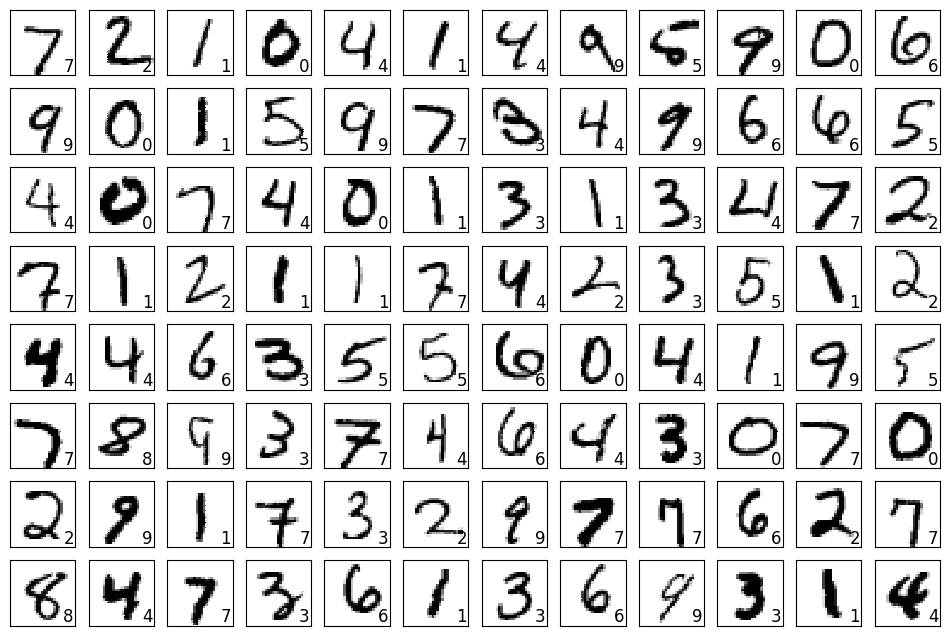

In [ ]:
show_prediction()
plt.show()

매우 잘 예측하는 것을 볼 수 있다.